In [32]:
#importing libraries to build the SVR MODEL

import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
import xgboost as xgb
import matplotlib.pyplot as plt


In [33]:

# Load the data into a DataFrame
data = pd.DataFrame({
    'Temperature (℃)': [40, 60, 80, 80, 60, 40, 60, 40, 60, 60, 60, 60, 60, 60, 60, 60, 80, 40, 60, 60, 40, 80, 60, 60, 80, 80, 60, 60, 40],
    'Catalyst loading (wt%)': [3, 3, 1, 5, 5, 5, 3, 3, 3, 1, 5, 3, 3, 3, 1, 3, 3, 3, 1, 5, 3, 3, 3, 1, 3, 3, 5, 3, 1],
    'Time (mins)': [105, 105, 105, 105, 150, 105, 105, 150, 150, 105, 105, 150, 60, 105, 105, 105, 60, 60, 60, 105, 105, 105, 60, 150, 150, 105, 60, 105, 105],
    'Methanol-oil ratio': [15, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 10.5, 15, 6, 15, 6, 15, 10.5, 15, 10.5, 10.5, 10.5, 10.5, 6, 6, 6, 6, 10.5, 10.5, 15, 10.5, 10.5, 10.5],
    'Actual yield (%)': [59.8, 92.6, 88.2, 60.6, 85.2, 59.4, 92.6, 58.8, 75.6, 69.6, 76.6, 78.2, 84.0, 95.0, 87.0, 90.2, 81.8, 58.4, 89.6, 65.6, 59.0, 86.0, 70.0, 96.4, 74.6, 86.6, 79.0, 92.6, 79.8]
})

# Split the data into input features (X) and target variable (y)
#The input features X DataFrame contains only the features that will be used to train the model
#The target variable y Dataframe contains only the features that would be use as target variables during testing and evaluation 
X = data.drop('Actual yield (%)', axis=1)
y = data['Actual yield (%)']

#fEATURE SCALING
st_x = StandardScaler()
st_y = StandardScaler()


In [34]:
#Here we split the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#We defined the SVR Model here
svr_model = SVR()

#Defining the parameter for hyperparameter tuning

param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

#Performing grid search cross-validation for hyperparameter tuning

grid_search = GridSearchCV(svr_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

#Getting the best hyperparameters and the best model

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#Evaluating the model performance on the test set

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)




Mean Squared Error: 32.98379625214677
R2 Score: 0.5036215532918853


In [35]:
#3. Generating the predicted values and putting it side by side the actual value for the SVR model

# Generate predicted values
y_pred = best_model.predict(X)

# Create a DataFrame with actual and predicted values
svr_results = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

# Print the results
print(svr_results)


    Actual  Predicted
0     59.8  68.443549
1     92.6  92.499766
2     88.2  88.099695
3     60.6  68.678642
4     85.2  85.100287
5     59.4  68.443705
6     92.6  92.499766
7     58.8  68.463420
8     75.6  78.501735
9     69.6  78.312968
10    76.6  76.699961
11    78.2  78.300287
12    84.0  78.487296
13    95.0  92.499766
14    87.0  86.899970
15    90.2  92.499766
16    81.8  78.463420
17    58.4  68.463420
18    89.6  88.468058
19    65.6  68.496124
20    59.0  68.443549
21    86.0  85.899970
22    70.0  78.487296
23    96.4  88.581164
24    74.6  74.700158
25    86.6  86.500158
26    79.0  78.899770
27    92.6  92.499766
28    79.8  79.699978


In [18]:
#4. Ranking the input features using XGB in order of importance

import xgboost as xgb

# Create an XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X, y)

# Get feature importances
importance = xgb_model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
sorted_indices = np.argsort(importance)[::-1]
sorted_features = feature_names[sorted_indices]

# Print feature importance rankings
print("Feature Importance Rankings:")
for i, feature in enumerate(sorted_features):
    print(f"{i+1}. {feature}: {importance[sorted_indices[i]]}")


Feature Importance Rankings:
1. Temperature (℃): 0.4289235770702362
2. Methanol-oil ratio: 0.26578858494758606
3. Catalyst loading (wt%): 0.25604966282844543
4. Time (mins): 0.04923812299966812


C:\Users\Benita chinemerem\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)
C:\Users\Benita chinemerem\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


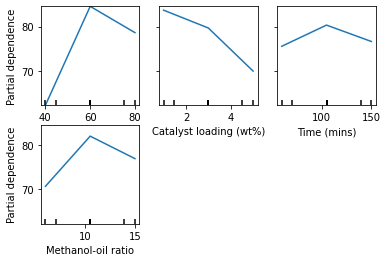

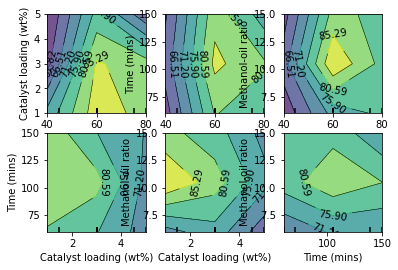

In [21]:
#5. generating one-way and two-way partial dependence plots using the XGBoost model.

from sklearn.inspection import partial_dependence, PartialDependenceDisplay
from sklearn.inspection import plot_partial_dependence

# Calculate partial dependence for one-way plots
one_way_plots = plot_partial_dependence(xgb_model, X, features=[0, 1, 2, 3], feature_names=X.columns, grid_resolution=100)

# Calculate partial dependence for two-way plots
two_way_plots = plot_partial_dependence(xgb_model, X, [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)], feature_names=X.columns, grid_resolution=100)

# Show the plots
plt.show()




In [25]:
import sklearn
print(sklearn.__version__)


1.0.2
